In [28]:
%pip install pandas_datareader yfinance matplotlib pandas_ta

from statsmodels.regression.rolling import RollingOLS
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import datetime as dt 
import yfinance as yf
#import pandas_ta as ta
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [15]:
sp_500 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S&P_500_companies') [0]

Lets clean the above data a bit

In [16]:
sp_500['Symbol'] = sp_500['Symbol'].str.replace('.', '-')
symbol_list = sp_500['Symbol'].unique().tolist()

end_date  = '2025-05-10'
start_date = pd.to_datetime(end_date) - pd.DateOffset(365*8) #going back 8 years

df = yf.download(tickers=symbol_list, start=start_date, end=end_date)

[*********************100%***********************]  503 of 503 completed


In [18]:
df

Price            Close                                                  \
Ticker               A        AAPL        ABBV        ABNB         ABT   
Date                                                                     
2017-05-12   52.861504   36.360306   46.917576         NaN   38.138569   
2017-05-15   53.369789   36.267147   47.350826         NaN   38.207973   
2017-05-16   53.492168   36.213566   47.478668         NaN   37.904324   
2017-05-17   52.494411   34.997669   46.427532         NaN   37.375114   
2017-05-18   52.569717   35.531075   46.612183         NaN   37.288342   
...                ...         ...         ...         ...         ...   
2025-05-05  108.370003  198.629532  196.070007  124.889999  132.600006   
2025-05-06  105.239998  198.250015  187.149994  121.669998  133.059998   
2025-05-07  107.519997  195.992981  188.089996  123.120003  133.949997   
2025-05-08  108.699997  197.231369  185.580002  126.389999  134.000000   
2025-05-09  106.930000  198.270004  184.600006  127.040001  133.240005   

Price                                                                 ...  \
Ticker           ACGL         ACN        ADBE         ADI        ADM  ...   
Date                                                                  ...   
2017-05-12  30.172010  106.990791  136.839996   67.199364  32.908413  ...   
2017-05-15  30.327324  108.131813  137.600006   68.549644  33.049587  ...   
2017-05-16  30.206877  108.919044  138.029999   69.267548  33.112820  ...   
2017-05-17  29.931116  106.530869  134.330002   67.019897  32.812508  ...   
2017-05-18  30.194197  106.495468  134.539993   68.780403  32.646542  ...   
...               ...         ...         ...         ...        ...  ...   
2025-05-05  92.580002  307.709991  381.059998  196.823868  47.017044  ...   
2025-05-06  93.000000  303.799988  382.980011  194.713486  47.828709  ...   
2025-05-07  92.690002  306.089996  384.970001  198.954163  47.393181  ...   
2025-05-08  94.559998  308.880005  383.989990  201.860931  47.215012  ...   
2025-05-09  94.540001  307.899994  383.279999  206.569489  48.036572  ...   

Price        Volume                                                         \
Ticker          WTW       WY     WYNN      XEL       XOM      XYL      YUM   
Date                                                                         
2017-05-12   937700  1743000  2374900  3460100   7480200   982900  1482300   
2017-05-15  1020100  1646600  1396300  2721400  10881500  1637800  1619900   
2017-05-16   789800  1786800  2408100  2601800   9574200  1109000  2440300   
2017-05-17  1340000  2637200  2716000  2096600  11151100  1073400  1798500   
2017-05-18  1493600  2639100  1651800  2498700   9905800   968700  3139300   
...             ...      ...      ...      ...       ...      ...      ...   
2025-05-05   570300  2814200  2105200  5645600  19624000  1411000  2308500   
2025-05-06   728600  5555900  3011500  2765400  16303400  1606800  2097000   
2025-05-07   816100  4117600  3846700  4552300  12332200  1664200  1416000   
2025-05-08   706800  3812400  3041300  3160000  19196500   986100  1410900   
2025-05-09   396300  4948200  3216400  2479300  10992100   664800  1068500   

Price                                 
Ticker          ZBH    ZBRA      ZTS  
Date                                  
2017-05-12  2089355  229800  3425100  
2017-05-15  2595703  357500  2319400  
2017-05-16  3984349  290700  1816300  
2017-05-17  1820834  440200  2397600  
2017-05-18  1121876  293800  1583700  
...             ...     ...      ...  
2025-05-05  7058300  426400  3888600  
2025-05-06  4203100  521600  4124400  
2025-05-07  2662400  822600  4453800  
2025-05-08  2886100  711000  5580100  
2025-05-09  3438600  700800  4243100  

[2010 rows x 2515 columns]

In [24]:
df = df.stack()

In [26]:
df.index.name = 'date'
df.columns = df.columns.str.lower()
df

Price                   close        high         low        open       volume
date       Ticker                                                             
2017-05-12 A        52.861504   53.087409   52.673250   52.861504    1578300.0
           AAPL     36.360306   36.434841   36.027215   36.034202  130108000.0
           ABBV     46.917576   47.009909   46.313884   46.356496    6093500.0
           ABT      38.138569   38.320759   38.060487   38.086517    5775800.0
           ACGL     30.172010   30.270269   30.086429   30.108618     593100.0
...                       ...         ...         ...         ...          ...
2025-05-09 XYL     122.458916  123.605256  122.229652  123.166655     664800.0
           YUM     146.411804  148.242819  145.774929  147.536278    1068500.0
           ZBH      95.209999   96.580002   94.360001   95.080002    3438600.0
           ZBRA    266.709991  268.579987  264.640015  267.670013     700800.0
           ZTS     159.270004  162.440002  159.080002  161.410004    4243100.0

[990334 rows x 5 columns]

Let's try out a fee features and indicators of the stocks that we have aggregated

Intraday colatility of a given asset - German-Klass Volatility

\begin{equation}
\text{Garman-Klass Volatility} = \frac{(\ln(\text{High}) - \ln(\text{Low}))^2}{2} - (2\ln(2) - 1)(\ln(\text{Adj Close}) - \ln(\text{Open}))^2
\end{equation}

In [33]:
#lets make a new column and compute the formula from above
df['garman_klass_vol'] = ((np.log(df['high']) - np.log(df['low']))**2) / 2 - (2*np.log(2) - 1)*((np.log(df['close']) - np.log(df['open']))**2)

df

Price                   close        high         low        open  \
date       Ticker                                                   
2017-05-12 A        52.861504   53.087409   52.673250   52.861504   
           AAPL     36.360306   36.434841   36.027215   36.034202   
           ABBV     46.917576   47.009909   46.313884   46.356496   
           ABT      38.138569   38.320759   38.060487   38.086517   
           ACGL     30.172010   30.270269   30.086429   30.108618   
...                       ...         ...         ...         ...   
2025-05-09 XYL     122.458916  123.605256  122.229652  123.166655   
           YUM     146.411804  148.242819  145.774929  147.536278   
           ZBH      95.209999   96.580002   94.360001   95.080002   
           ZBRA    266.709991  268.579987  264.640015  267.670013   
           ZTS     159.270004  162.440002  159.080002  161.410004   

Price                   volume  garman_klass_vol  
date       Ticker                                 
2017-05-12 A         1578300.0          0.000031  
           AAPL    130108000.0          0.000032  
           ABBV      6093500.0          0.000055  
           ABT       5775800.0          0.000023  
           ACGL       593100.0          0.000017  
...                        ...               ...  
2025-05-09 XYL        664800.0          0.000050  
           YUM       1068500.0          0.000118  
           ZBH       3438600.0          0.000270  
           ZBRA       700800.0          0.000104  
           ZTS       4243100.0          0.000150  

[990334 rows x 6 columns]

In [51]:
#Now lets look at the relative strength index
import pandas_ta
#rsi is Relative Strength Index - a technical indicator used in stock trading to assess the speed and change of price movements, helping traders identify potential overbought or oversold conditions.
df['rsi'] = df.groupby(level=1)['close'].transform(lambda x: pandas_ta.rsi(close=x, length=20))


Lets check a specfic one, maybe APPLE (AAPL)

<Axes: xlabel='date'>

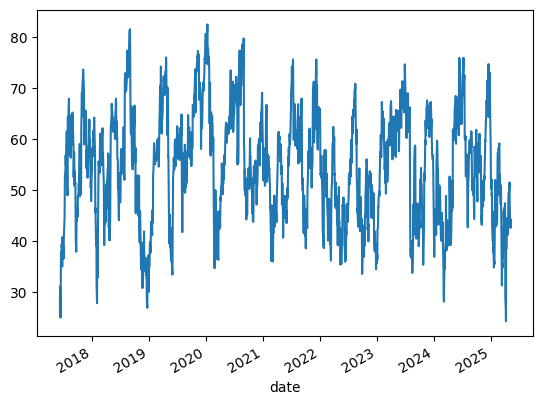

In [40]:
df.xs('AAPL', level=1)['rsi'].plot()

Now lets work with Bollinger Bands - these help us get a better sense of the volatility

In [ ]:
pandas_ta.bbands(close=df.xs('AAPL', level=1)['close'], length=20)

#first column is the lower band, secon column is the middle band, and third column is upper band 

,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0
date,,,,,
2017-05-12,NaN,NaN,NaN,NaN,NaN
2017-05-15,NaN,NaN,NaN,NaN,NaN
2017-05-16,NaN,NaN,NaN,NaN,NaN
2017-05-17,NaN,NaN,NaN,NaN,NaN
2017-05-18,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2025-05-05,179.609517,199.926330,220.243143,20.324299,0.468086
2025-05-06,182.325942,200.777712,219.229483,18.380297,0.431505
2025-05-07,188.701933,201.967651,215.233370,13.136479,0.274808


In [44]:
df['bb_low'] = df.groupby(level=1)['close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,0])
df['bb_mid'] = df.groupby(level=1)['close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,1])
df['bb_high'] = df.groupby(level=1)['close'].transform(lambda x: pandas_ta.bbands(close=np.log1p(x), length=20).iloc[:,2])

df


Price                   close        high         low        open  \
date       Ticker                                                   
2017-05-12 A        52.861504   53.087409   52.673250   52.861504   
           AAPL     36.360306   36.434841   36.027215   36.034202   
           ABBV     46.917576   47.009909   46.313884   46.356496   
           ABT      38.138569   38.320759   38.060487   38.086517   
           ACGL     30.172010   30.270269   30.086429   30.108618   
...                       ...         ...         ...         ...   
2025-05-09 XYL     122.458916  123.605256  122.229652  123.166655   
           YUM     146.411804  148.242819  145.774929  147.536278   
           ZBH      95.209999   96.580002   94.360001   95.080002   
           ZBRA    266.709991  268.579987  264.640015  267.670013   
           ZTS     159.270004  162.440002  159.080002  161.410004   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       Ticker                                                       
2017-05-12 A         1578300.0          0.000031        NaN       NaN   
           AAPL    130108000.0          0.000032        NaN       NaN   
           ABBV      6093500.0          0.000055        NaN       NaN   
           ABT       5775800.0          0.000023        NaN       NaN   
           ACGL       593100.0          0.000017        NaN       NaN   
...                        ...               ...        ...       ...   
2025-05-09 XYL        664800.0          0.000050  57.264322  4.665557   
           YUM       1068500.0          0.000118  48.007857  4.956436   
           ZBH       3438600.0          0.000270  39.772617  4.524654   
           ZBRA       700800.0          0.000104  52.322959  5.381005   
           ZTS       4243100.0          0.000150  52.741649  4.980900   

Price                bb_mid   bb_high  
date       Ticker                      
2017-05-12 A            NaN       NaN  
           AAPL         NaN       NaN  
           ABBV         NaN       NaN  
           ABT          NaN       NaN  
           ACGL         NaN       NaN  
...                     ...       ...  
2025-05-09 XYL     4.759171  4.852784  
           YUM     4.989254  5.022073  
           ZBH     4.600213  4.675772  
           ZBRA    5.494977  5.608949  
           ZTS     5.036342  5.091783  

[990334 rows x 10 columns]

Now lets work with the ATR. Average True Range (ATR) is a technical indicator that measures market volatility. It doesn't indicate the direction of price movement, but rather the degree of price fluctuation over a given period. Essentially, it helps traders understand how much a stock or asset typically moves, which is crucial for managing risk and making informed trading decisions. 


In [ ]:
#lets make a function

def compute_atr(stock_data):
    atr = pandas_ta.atr(high=stock_data['high'], 
                        low=stock_data['low'],
                        close=stock_data['close'],
                        length=14)
    
    #We should also normalize the data while the calculations are happening
    
    return atr.sub(atr.mean()).div(atr.std())

df['atr'] = df.groupby(level=1, group_keys=False).apply(compute_atr) #if we dont put false, it will double the date column, we dont want that
#.apply() lets you run a custom function on each group or row/column, making it very flexible for group-wise calculations.
df


Price                   close        high         low        open  \
date       Ticker                                                   
2017-05-12 A        52.861504   53.087409   52.673250   52.861504   
           AAPL     36.360306   36.434841   36.027215   36.034202   
           ABBV     46.917576   47.009909   46.313884   46.356496   
           ABT      38.138569   38.320759   38.060487   38.086517   
           ACGL     30.172010   30.270269   30.086429   30.108618   
...                       ...         ...         ...         ...   
2025-05-09 XYL     122.458916  123.605256  122.229652  123.166655   
           YUM     146.411804  148.242819  145.774929  147.536278   
           ZBH      95.209999   96.580002   94.360001   95.080002   
           ZBRA    266.709991  268.579987  264.640015  267.670013   
           ZTS     159.270004  162.440002  159.080002  161.410004   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       Ticker                                                       
2017-05-12 A         1578300.0          0.000031        NaN       NaN   
           AAPL    130108000.0          0.000032        NaN       NaN   
           ABBV      6093500.0          0.000055        NaN       NaN   
           ABT       5775800.0          0.000023        NaN       NaN   
           ACGL       593100.0          0.000017        NaN       NaN   
...                        ...               ...        ...       ...   
2025-05-09 XYL        664800.0          0.000050  57.264322  4.665557   
           YUM       1068500.0          0.000118  48.007857  4.956436   
           ZBH       3438600.0          0.000270  39.772617  4.524654   
           ZBRA       700800.0          0.000104  52.322959  5.381005   
           ZTS       4243100.0          0.000150  52.741649  4.980900   

Price                bb_mid   bb_high       atr  
date       Ticker                                
2017-05-12 A            NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN  
           ABT          NaN       NaN       NaN  
           ACGL         NaN       NaN       NaN  
...                     ...       ...       ...  
2025-05-09 XYL     4.759171  4.852784  1.472153  
           YUM     4.989254  5.022073  2.111444  
           ZBH     4.600213  4.675772  0.464573  
           ZBRA    5.494977  5.608949  0.598954  
           ZTS     5.036342  5.091783  1.426151  

[990334 rows x 11 columns]

The next indicator we will calculate is the MACD indicator. Moving Average Convergence Divergence indicator is a popular technical analysis tool used to identify potential buy and sell signals in financial markets. Traders use MACD to understand price trends, momentum, and potential reversals, making it a versatile tool for both beginners and experienced traders 

In [ ]:
def compute_macd(close):
    macd = pandas_ta.macd(close=close, length=20).iloc[:,0]
    return macd.sub(macd.mean()).div(macd.std())

df['macd'] = df.groupby(level=1, group_keys=False)['close'].apply(compute_macd)

df

Price                   close        high         low        open  \
date       Ticker                                                   
2017-05-12 A        52.861504   53.087409   52.673250   52.861504   
           AAPL     36.360306   36.434841   36.027215   36.034202   
           ABBV     46.917576   47.009909   46.313884   46.356496   
           ABT      38.138569   38.320759   38.060487   38.086517   
           ACGL     30.172010   30.270269   30.086429   30.108618   
...                       ...         ...         ...         ...   
2025-05-09 XYL     122.458916  123.605256  122.229652  123.166655   
           YUM     146.411804  148.242819  145.774929  147.536278   
           ZBH      95.209999   96.580002   94.360001   95.080002   
           ZBRA    266.709991  268.579987  264.640015  267.670013   
           ZTS     159.270004  162.440002  159.080002  161.410004   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       Ticker                                                       
2017-05-12 A         1578300.0          0.000031        NaN       NaN   
           AAPL    130108000.0          0.000032        NaN       NaN   
           ABBV      6093500.0          0.000055        NaN       NaN   
           ABT       5775800.0          0.000023        NaN       NaN   
           ACGL       593100.0          0.000017        NaN       NaN   
...                        ...               ...        ...       ...   
2025-05-09 XYL        664800.0          0.000050  57.264322  4.665557   
           YUM       1068500.0          0.000118  48.007857  4.956436   
           ZBH       3438600.0          0.000270  39.772617  4.524654   
           ZBRA       700800.0          0.000104  52.322959  5.381005   
           ZTS       4243100.0          0.000150  52.741649  4.980900   

Price                bb_mid   bb_high       atr      macd  
date       Ticker                                          
2017-05-12 A            NaN       NaN       NaN       NaN  
           AAPL         NaN       NaN       NaN       NaN  
           ABBV         NaN       NaN       NaN       NaN  
           ABT          NaN       NaN       NaN       NaN  
           ACGL         NaN       NaN       NaN       NaN  
...                     ...       ...       ...       ...  
2025-05-09 XYL     4.759171  4.852784  1.472153  0.952850  
           YUM     4.989254  5.022073  2.111444 -0.495916  
           ZBH     4.600213  4.675772  0.464573 -1.196245  
           ZBRA    5.494977  5.608949  0.598954 -0.040843  
           ZTS     5.036342  5.091783  1.426151  0.061950  

[990334 rows x 12 columns]

And for the last indicator, the dollar volume - it represents the total monetary value of shares traded in a specific stock over a defined period, usually a trading day. It's calculated by multiplying the trading volume (number of shares traded) by the stock's price. Essentially, it shows how much money is flowing into or out of a particular stock. 


In [53]:
df['dollar_volume'] = (df['close'] * df['volume'] / 1e6)

df

Price                   close        high         low        open  \
date       Ticker                                                   
2017-05-12 A        52.861504   53.087409   52.673250   52.861504   
           AAPL     36.360306   36.434841   36.027215   36.034202   
           ABBV     46.917576   47.009909   46.313884   46.356496   
           ABT      38.138569   38.320759   38.060487   38.086517   
           ACGL     30.172010   30.270269   30.086429   30.108618   
...                       ...         ...         ...         ...   
2025-05-09 XYL     122.458916  123.605256  122.229652  123.166655   
           YUM     146.411804  148.242819  145.774929  147.536278   
           ZBH      95.209999   96.580002   94.360001   95.080002   
           ZBRA    266.709991  268.579987  264.640015  267.670013   
           ZTS     159.270004  162.440002  159.080002  161.410004   

Price                   volume  garman_klass_vol        rsi    bb_low  \
date       Ticker                                                       
2017-05-12 A         1578300.0          0.000031        NaN       NaN   
           AAPL    130108000.0          0.000032        NaN       NaN   
           ABBV      6093500.0          0.000055        NaN       NaN   
           ABT       5775800.0          0.000023        NaN       NaN   
           ACGL       593100.0          0.000017        NaN       NaN   
...                        ...               ...        ...       ...   
2025-05-09 XYL        664800.0          0.000050  57.264322  4.665557   
           YUM       1068500.0          0.000118  48.007857  4.956436   
           ZBH       3438600.0          0.000270  39.772617  4.524654   
           ZBRA       700800.0          0.000104  52.322959  5.381005   
           ZTS       4243100.0          0.000150  52.741649  4.980900   

Price                bb_mid   bb_high       atr      macd  dollar_volume  
date       Ticker                                                         
2017-05-12 A            NaN       NaN       NaN       NaN      83.431311  
           AAPL         NaN       NaN       NaN       NaN    4730.766665  
           ABBV         NaN       NaN       NaN       NaN     285.892248  
           ABT          NaN       NaN       NaN       NaN     220.280746  
           ACGL         NaN       NaN       NaN       NaN      17.895019  
...                     ...       ...       ...       ...            ...  
2025-05-09 XYL     4.759171  4.852784  1.472153  0.952850      81.410687  
           YUM     4.989254  5.022073  2.111444 -0.495916     156.441013  
           ZBH     4.600213  4.675772  0.464573 -1.196245     327.389103  
           ZBRA    5.494977  5.608949  0.598954 -0.040843     186.910362  
           ZTS     5.036342  5.091783  1.426151  0.061950     675.798555  

[990334 rows x 13 columns]